In [2]:
import Pkg; 
Pkg.add("DataFrames")
Pkg.add("Missings")
Pkg.add("Plots")
Pkg.add("CSV")
Pkg.add("JSON")
Pkg.add("HTTP")
Pkg.add("Parquet")
Pkg.add("Arrow")
using Parquet
using DataFrames
using CSV
using Missings
using Plots
using JSON
using HTTP
using Arrow

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [3]:
# write then read csv file - loss of information 
a = ["The Hobbit", "The Lord of the Rings", "The Silmarillion"]
b = [["J.R.R. Tolkien"], ["J.R.R. Tolkien"], ["J.R.R. Tolkien", "Christopher Tolkien"]]
df = DataFrame(Book = a, Author = b)
CSV.write("books.csv", df)
show(df)
df.Author
# the Author column is a vector of strings


3×2 DataFrame
 Row │ Book                   Author                            
     │ String                 Array…                            
─────┼──────────────────────────────────────────────────────────
   1 │ The Hobbit             ["J.R.R. Tolkien"]
   2 │ The Lord of the Rings  ["J.R.R. Tolkien"]
   3 │ The Silmarillion       ["J.R.R. Tolkien", "Christopher …

3-element Vector{Vector{String}}:
 ["J.R.R. Tolkien"]
 ["J.R.R. Tolkien"]
 ["J.R.R. Tolkien", "Christopher Tolkien"]

In [4]:
dfCSV = CSV.read("books.csv", DataFrame)
dfCSV.Author
# note that the Author column is now a string

3-element Vector{String}:
 "[\"J.R.R. Tolkien\"]"
 "[\"J.R.R. Tolkien\"]"
 "[\"J.R.R. Tolkien\", \"Christopher Tolkien\"]"

In [17]:
# ask the class 

using JSON
fileName = "contacts.json"
json_file = open(fileName)
json_data = JSON.parse(json_file)
# Convert the JSON data to a DataFrame
df = DataFrame(json_data)
# what is the structure of the DataFrame?


# print names and emails  ????



adam adam@mit.edu
anne anne@mit.edu
fred fred@mit.edu


3

In [ ]:
for i in 1:nrow(df)
    println(df[i,1]["name"], " ", df[i,1]["email"])
end

In [15]:
# get data from url
url = "https://pollysnips.s3.amazonaws.com/bostonEmployeeSalaries.json"
json_data = JSON.parse(String(read(download(url))))



Dict{String, Any} with 2 entries:
  "meta" => Dict{String, Any}("view"=>Dict{String, Any}("publicationDate"=>1426…
  "data" => Any[Any[1, "17439B12-1A55-4B6A-980E-5BAC15841AC4", 1, 1426008064, "…

In [16]:
# get meta from json_data
meta = json_data["meta"]

Dict{String, Any} with 1 entry:
  "view" => Dict{String, Any}("publicationDate"=>1426008247, "rowsUpdatedAt"=>1…

In [17]:
data = json_data["data"]
typeof(data)

Vector{Any} (alias for Array{Any, 1})

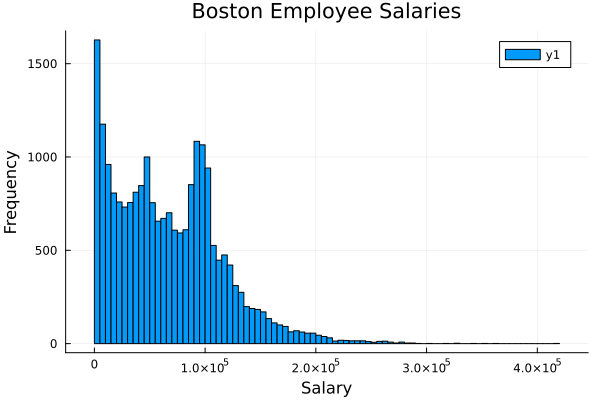

In [10]:

# check length of all rows
foreach(row -> if (length(row)) != 20 println(row) end, data)
size(data)
# remove rows with missing data
data = filter(row -> length(row) == 20, data)
size(data)
# loop over data extract column 19 into a vector
salaries = []
foreach(row -> push!(salaries, row[19]), data)
# convert salaries to float
salaries = map(x -> parse(Float64, x), salaries)
# plot salaries
histogram(salaries, bins=100, title="Boston Employee Salaries", xlabel="Salary", ylabel="Frequency")





Teacher:  $342249.43
Superintendent:  $259165.28
Police Sergeant (Det):  $292205.66
Police Captain/DDC:  $259927.77
Police Sergeant/Comm Serv Offc:  $253657.16
Police Captain-DDC/HRCD:  $264011.18
Police Sergeant/Bomb Squad:  $259790.57
Police Captain:  $261562.81
Police Lieutenant:  $256751.24
Police Lieutenant:  $325943.63
Police Captain/DDC:  $415709.53
Police Lieutenant (Det):  $275285.27
Police Lieutenant (Det):  $267080.63
Police Captain:  $317181.55
Police Lieutenant:  $259580.90
Police Sergeant (Det):  $269490.31
Police Lieutenant:  $266502.85
Police Sergeant (Det):  $257268.12
Police Sergeant (Det):  $276387.03
Police Lieutenant (Det):  $282890.41
Police Sergeant (Det):  $261667.77
Police Lieutenant:  $273965.35
Police Captain/DDC:  $285741.92
Police Lieutenant (Det):  $289436.19
Police Captain/DDC:  $260639.92
Police Captain (Det):  $258471.41
Police Lieutenant (Det):  $251100.45
Police Sergeant:  $258297.08
Police Captain/DDC:  $325578.99
Police Lieutenant:  $261662.92
Polic

251128.65
Police Sergeant (Det):  $275265.16
Police Sergeant:  $263690.31
Police Lieutenant/Hdq Dispatch:  $300065.62
Police Sergeant (Det):  $260958.80
Police Sergeant (Det):  $280827.76
Police Lieutenant/Hdq Dispatch:  $267967.45
Police Lieutenant:  $264578.92
Police Sergeant (Det):  $279260.96
Police Sergeant (Det):  $264917.89
Police Sergeant/CHF RADIO DISP:  $275824.50
Dep Fire Chief:  $258718.80
Fire Captain Admin-ADR:  $252549.08
Dep Fire Chief Adm-Tech-ADR:  $267979.29
Dep Fire Chief:  $259594.82
District Fire Chief-Technician:  $262415.73


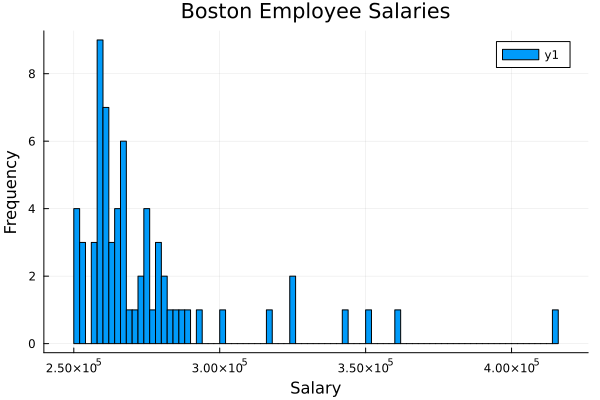

In [11]:
# get index of salaries greater than 250,000 and print column 10 (job title) and column 19 (salary

idx = findall(x -> x > 250000, salaries)
foreach(i -> println(data[i][10],":  \$", data[i][19]), idx)
topsalaries = []
foreach(i -> push!(topsalaries, data[i][19]), idx)
# convert salaries to float
topsalaries = map(x -> parse(Float64, x), topsalaries)
histogram(topsalaries, bins=100, title="Boston Employee Salaries", xlabel="Salary", ylabel="Frequency")


In [34]:
# flatten each row of data into a vector
pdata = map(row -> reduce(vcat, row), data)
df = DataFrame(pdata,:auto)
# make each row a column
df = permutedims(df)
# print the first 5 rows
typeof(df.x1)



Vector{Any} (alias for Array{Any, 1})

In [35]:
# write dataframe to arrow file 
using Arrow
arrow_file = "bostonEmployeeSalaries.arrow" 
# split arrow files into 100 Kb chunks

Arrow.write(arrow_file, df)


"bostonEmployeeSalaries.arrow"

In [24]:
# read arrow file
using Arrow
arrow_file = "bostonEmployeeSalaries.arrow" 
at = Arrow.Table(arrow_file)
df = DataFrame(at)
# demo arrow table  
salaries = at.x19
typeof(salaries)



Arrow.List{String, Int32, Vector{UInt8}}

In [ ]:
Pkg.add("JSON")
using JSON
using HTTP

url = "https://pollysnips.s3.amazonaws.com/contacts.json"
res = HTTP.get(url)
str = String(res.body)
jobj = JSON.Parser.parse(str)

In [1]:
# write then read csv file - loss of information 
a = ["The Hobbit", "The Lord of the Rings", "The Silmarillion"]
b = [["J.R.R. Tolkien"], ["J.R.R. Tolkien"], ["J.R.R. Tolkien", "Christopher Tolkien"]]
df = DataFrame(Book = a, Author = b)
CSV.write("books.csv", df)
dfbooks = CSV.read("books.csv", DataFrame)
dfbooks[3, :Author]

UndefVarError: UndefVarError: DataFrame not defined